In [1]:
import numpy as np
from statsmodels.tsa.stattools import grangercausalitytests

In [52]:
with open('x1.txt', 'r') as f:
    x1 = f.read().splitlines()
with open('x2.txt', 'r') as f:
    x2 = f.read().splitlines()

In [53]:
X = np.array([x1,x2]).astype("double").T
mxlg = 1

In [54]:
X.shape

(65536, 2)

In [55]:
%%time
grangercausalitytests(X, mxlg, addconst=True, verbose=True);


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.2270  , p=0.2680  , df_denom=65532, df_num=1
ssr based chi2 test:   chi2=1.2271  , p=0.2680  , df=1
likelihood ratio test: chi2=1.2271  , p=0.2680  , df=1
parameter F test:         F=1.2270  , p=0.2680  , df_denom=65532, df_num=1
CPU times: user 81.8 ms, sys: 8.17 ms, total: 89.9 ms
Wall time: 27.9 ms


{1: ({'ssr_ftest': (1.2270091440601762, 0.2679935434365674, 65532.0, 1),
   'ssr_chi2test': (1.2270653155097302, 0.2679785243827986, 1),
   'lrtest': (1.2270538280135952, 0.267980764393122, 1),
   'params_ftest': (1.227009144077505, 0.26799354342991444, 65532.0, 1.0)},
   array([[0., 1., 0.]])])}

In [ ]:
5 , 17 

In [65]:
11
# lag matrix
lag = np.array([0.012256, 0.011616, 0.011776, 0.011872, 0.012288,0.012288,
    0.041184, 0.067712, 0.099488, 0.102464, 0.131936, 0.243712])

# OLS 1 
ols1 = np.array([0.176800, 0.181376, 0.177536,0.194976,0.201568,0.199136,
    0.197952, 0.195040, 0.194208, 0.265152, 0.206304, 0.199328])

# OLS 2
ols2 = np.array([0.163328, 0.164448, 0.156224,0.168128,0.182048,0.183872,
    0.180800, 0.180064, 0.217536, 0.185216, 0.193632, 0.248832])

# chi-2
chi2 = np.array([0.000201, 0.000211, 0.000210,0.000211, 0.000210,0.000301,
    0.000311, 0.000310, 0.000230, 0.000240, 0.000210, 0.000321])

In [70]:
total = lag + ols1+ ols2 + chi2

py = [4.83, 5.62, 21.6,18.8, 
    23.7,23.8, 21.9, 32.1, 38.5, 48.8, 57.9, 89.9
]

In [71]:
# libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [80]:
x = [pow(2,i) for i in range(5,17)]

In [85]:
df=pd.DataFrame({'Array length': x, 'Lag matrix': lag, "OLS joint": ols1, 
                 "OLS own": ols2, "Chi2": chi2, "CUDA": total, "CPU": py})

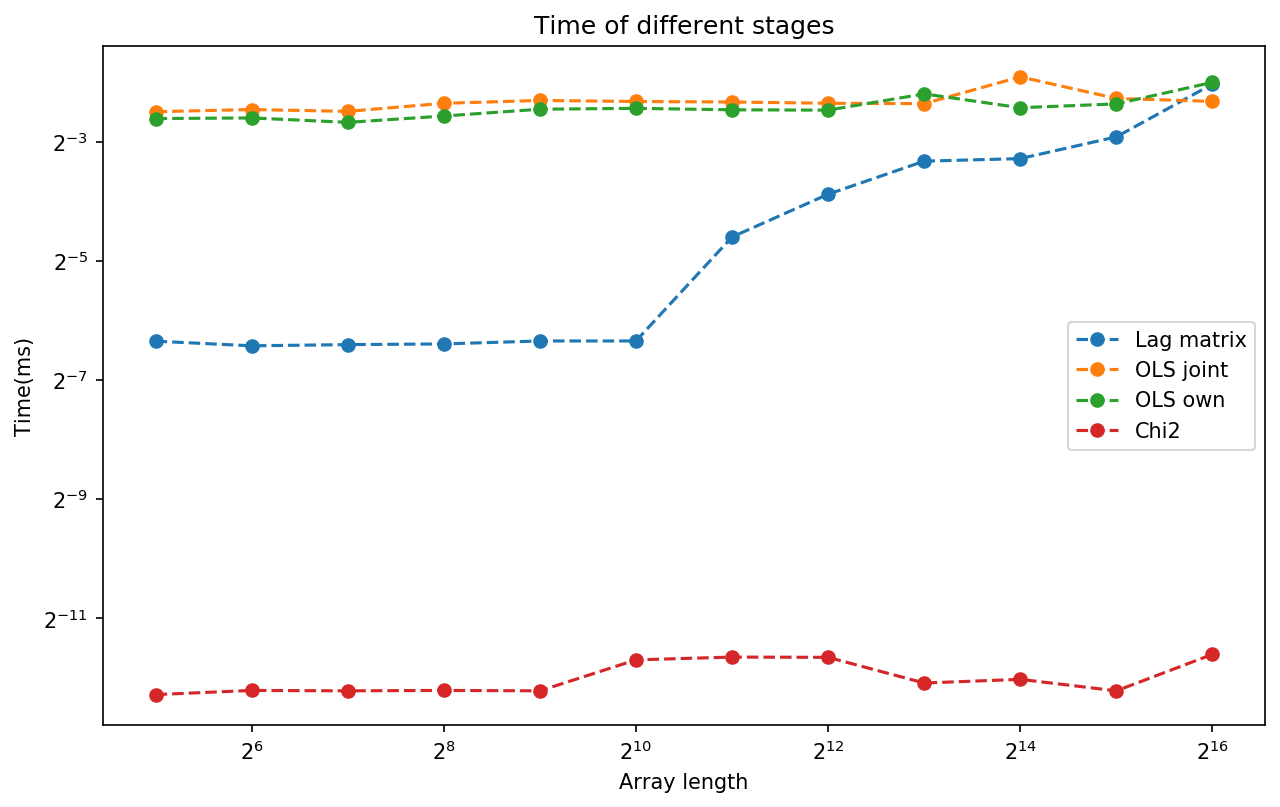

In [86]:
 
# multiple line plot
fig, ax = plt.subplots(figsize=(10,6), dpi=150)
ax.plot( 'Array length', 'Lag matrix', data=df, marker='o',linestyle='dashed')
ax.plot( 'Array length', 'OLS joint', data=df, marker='o',linestyle='dashed')
ax.plot( 'Array length', 'OLS own', data=df, marker='o',linestyle='dashed')
ax.plot( 'Array length', 'Chi2', data=df, marker='o',linestyle='dashed')

ax.set_xscale('log', basex=2)
ax.set_yscale('log', basey=2)

plt.title("Time of different stages")
plt.xlabel("Array length")
plt.ylabel("Time(ms)")

plt.legend()
# plt.savefig("task2.pdf", bbox_inches='tight')

In [ ]:
'Array length': x, 'Lag matrix': lag, "OLS joint": ols1, 
                 "OLS own": ols2, "Chi2": 

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f66862a1af0>],
      dtype=object)

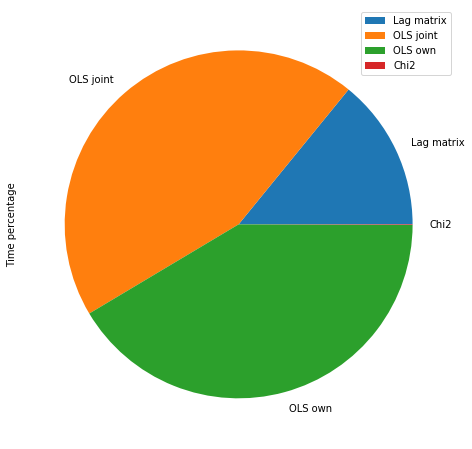

In [89]:
df = pd.DataFrame([sum(lag),sum(ols1),sum(ols2),sum(chi2)], 
                  index=['Lag matrix', "OLS joint", "OLS own", "Chi2"], columns=['Time percentage'])
 
# make the plot
df.plot(kind='pie', subplots=True, figsize=(8, 8))